# **Creating ANN (Artificial Neural Network) Model Using PyTorch**

### Steps for creating the fully connected Artificial Neural Network

1) Load the data (how means in batches)
2) Creating FCNN
3) Creating the training loop
4) Optimise the parameters
5) Predict

# 1) Load the data (how means in batches)

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms
from torch.autograd import Variable

In [2]:
transform = transforms.Compose([transforms.RandomResizedCrop(24), transforms.ToTensor()])

In [3]:
train = datasets.FashionMNIST(root="FashionMNIST/processed/", train=True, download=True, transform=transform)
test = datasets.FashionMNIST(root="FashionMNIST/processed/", train=False, download=True, transform=transform)

C:\Users\manoj\AppData\Roaming\Python\Python38\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: FashionMNIST/processed/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(24, 24), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               ToTensor()
           )

In [5]:
test

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: FashionMNIST/processed/
    Split: Test
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(24, 24), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               ToTensor()
           )

In [7]:
batch_size=32
train_data = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=True)
test_data = DataLoader(test, batch_size=batch_size, shuffle=True, drop_last=True)

In [8]:
in_features=next(iter(train_data))[0].view(32,-1).shape[-1]
in_features

576

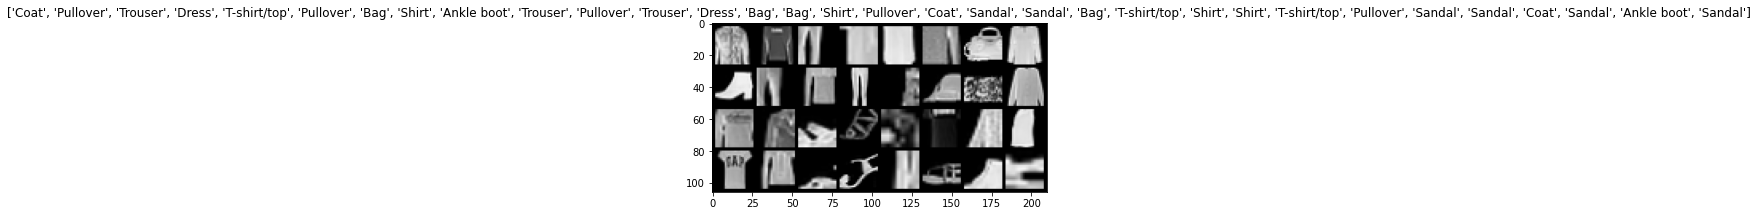

In [12]:
# here we are just plotting the 1 bath file images
import torchvision
class_names = train.classes
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
#     mean = np.array([0.485, 0.456, 0.406])
#     std = np.array([0.229, 0.224, 0.225])
#     inp = std * inp + mean
#     inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputx = next(iter(train_data))
inputs, classes = inputx[0], inputx[1]

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [9]:
class Net(nn.Module):
    def __init__(self,in_features):
        super().__init__()
        self.fc1=nn.Linear(in_features,128)
        self.fc2=nn.Linear(128,128)
        self.fc3 = nn.Linear(128, 32)
        self.fc4=nn.Linear(32,10)
        self.relu=nn.ReLU()
        self.softmax=nn.Softmax()
        self.dropout=nn.Dropout(0.2)
        
    def forward(self,x):
        x=self.relu(self.fc1(x))
        x=self.dropout(x)
        x=self.relu(self.fc2(x))
        x=self.dropout(x)
        x=self.relu(self.fc3(x))
        x=self.dropout(x)
        x=self.softmax(self.fc4(x))
        
        return x

In [10]:
model = Net(in_features)
criterion=nn.CrossEntropyLoss()
# from torch.optim.lr_scheduler import StepLR
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
# scheduler = StepLR(optimizer, step_size=5, gamma=0.1)